#Image Inpainting - Flow matching


In [1]:
! gdown  --id 194DqJkUjjtlUCp7Sd2DkXgwu7SuBFsrj
! unzip celeba_hq_256.zip


Streaming output truncated to the last 5000 lines.
  inflating: celeba_hq_256/25000.jpg  
  inflating: celeba_hq_256/25001.jpg  
  inflating: celeba_hq_256/25002.jpg  
  inflating: celeba_hq_256/25003.jpg  
  inflating: celeba_hq_256/25004.jpg  
  inflating: celeba_hq_256/25005.jpg  
  inflating: celeba_hq_256/25006.jpg  
  inflating: celeba_hq_256/25007.jpg  
  inflating: celeba_hq_256/25008.jpg  
  inflating: celeba_hq_256/25009.jpg  
  inflating: celeba_hq_256/25010.jpg  
  inflating: celeba_hq_256/25011.jpg  
  inflating: celeba_hq_256/25012.jpg  
  inflating: celeba_hq_256/25013.jpg  
  inflating: celeba_hq_256/25014.jpg  
  inflating: celeba_hq_256/25015.jpg  
  inflating: celeba_hq_256/25016.jpg  
  inflating: celeba_hq_256/25017.jpg  
  inflating: celeba_hq_256/25018.jpg  
  inflating: celeba_hq_256/25019.jpg  
  inflating: celeba_hq_256/25020.jpg  
  inflating: celeba_hq_256/25021.jpg  
  inflating: celeba_hq_256/25022.jpg  
  inflating: celeba_hq_256/25023.jpg  
  inflating: 

In [1]:
import os
import random

file_names = os.listdir("./celeba_hq_256")
img_paths = ["./celeba_hq_256/"+file_name for file_name in file_names]
print("Datasets length:",len(img_paths))
sample_rate = int(len(img_paths)*0.9)
train_imgpaths = random.sample(img_paths,sample_rate)
val_imgpaths = [img_path for img_path in img_paths if img_path not in train_imgpaths]
len(train_imgpaths),len(val_imgpaths)

Datasets length: 30000


(27000, 3000)

In [2]:
import numpy as np
def bbox2mask(img_shape,bbox,dtype="uint8"):

  height,width = img_shape[:2]
  mask = np.zeros((height,width,1),dtype=dtype)
  mask[bbox[0]:bbox[0]+bbox[2],bbox[1]:bbox[1]+bbox[3],:] = 1
  return mask

In [3]:
import torch
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset
class InpaintingDataset(Dataset):
  def __init__(self,img_paths,img_size=[256,256]):
    self.img_paths = img_paths
    self.tfs = transforms.Compose([
        transforms.Resize((img_size[0],img_size[1])),
        transforms.ToTensor()
    ])
    self.image_size = img_size
  def __getitem__(self,index):
    img_path = self.img_paths[index]
    img = Image.open(img_path).convert("RGB")
    img = self.tfs(img)
    mask = self.get_mask()
    return {
        "gt_image":img,
        "mask":mask,
        "path":img_path
    }
  def __len__(self):
    return len(self.img_paths)
  def get_mask(self):
    h,w = self.image_size
    mask = bbox2mask(self.image_size,(h//4,w//4,h//4,w//4))
    return torch.from_numpy(mask).permute(2,0,1)
train_dataset = InpaintingDataset(train_imgpaths)
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
val_loader = torch.utils.data.DataLoader(InpaintingDataset(val_imgpaths),batch_size=batch_size,shuffle=False,drop_last=True)

In [5]:
!pip install -q torchcfm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:

from torchcfm.models.unet import UNetModel
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetModel(dim=(3,256,256),num_channels=32,num_res_blocks=1).to(device)
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 3
for epoch in tqdm(range(n_epochs),desc="training"):
  losses = []
  for i, data in enumerate(train_loader):
    optimizer.zero_grad()
    x1 = data['gt_image'].to(device)
    mask = data['mask'].to(device)
    x0 = torch.randn_like(x1).to(device)

    x_noise = (1.-mask)*x1 + mask*x0
    t = torch.rand(x0.shape[0],1,1,1).to(device)
    xt = t*x1 + (1.-t)*x_noise
    ut = x1- x_noise

    t = t.squeeze()
    x_cond = xt*mask + (1.-mask)*x1
    vt = model(t,x_cond)

    loss = torch.mean(((vt-ut)**2)*mask)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  avg_loss = sum(losses)/len(losses)

  print(f"epoch: {epoch}, loss: {avg_loss:.4f}")

training:  33%|███▎      | 1/3 [15:14<30:28, 914.04s/it]

epoch: 0, loss: 0.0059


training:  67%|██████▋   | 2/3 [30:30<15:15, 915.36s/it]

epoch: 1, loss: 0.0029


training: 100%|██████████| 3/3 [45:46<00:00, 915.48s/it]

epoch: 2, loss: 0.0026


In [6]:
model.eval()
def euler_method(model,cond_image,t_steps,dt,mask):
  y = cond_image
  y_values = [y]
  with torch.no_grad():
    for t in t_steps[1:]:
      t = t.reshape(-1,)
      dy = model(t.to(device),y.to(device))
      y = y + dy*dt
      y = cond_image*(1.-mask) + mask*y
      y_values.append(y)
  return torch.stack(y_values)

sample = next(iter(val_loader))
gt_image = sample['gt_image'].to(device)
noise = torch.randn_like(gt_image,device=device)
mask = sample['mask'].to(device)
cond_image = gt_image*(1.-mask) + mask*noise

t_steps = torch.linspace(0,1,50,device=device)
dt = t_steps[1] - t_steps[0]

traj = euler_method(model,cond_image,t_steps,dt,mask)


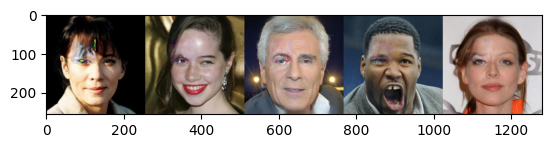

In [7]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from torchvision.utils import make_grid

grid = make_grid(
    traj[-1, -5:].view([-1, 3, 256, 256]).clip(-1, 1), value_range=(-1, 1), padding=0, nrow=10
)
img = ToPILImage()(grid)
plt.imshow(img)
plt.show()